# Lasso Regression

The code creates a Lasso regression model using the sklearn Lasso library.

It involves importing the data, choosing the appropriate columns, and generating the model. 

Residual plots and "Predicted vs Test values" graphs are shown.

The code was ran on Google Colaboratory, which is why there is a odd import of the dataset.

In [0]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive

In [3]:
# Mounting the Google Drive locally. Allows me to access my own drives.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [24]:
dataset = pd.read_csv('/content/drive/Shared drives/EnergyForecaster/Dataset/normalized_by_2000_dtpts.csv')
dataset.dropna(inplace=True)
dataset.pop("Unnamed: 0")
dataset

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Normalized_Solar_lin,Normalized_Solar_geom,Normalized_Solar,normalized_solar
0,13,0,13,50,204,77,4,10.0,82.67,0.143,2.9,3.814,355.2,96.35,11.0,1010.0,0.000080,9.756098e-07,9.756098e-07,6.611570e-07,0.000004
1,65,0,65,81,356,160,8,10.0,77.27,0.143,3.0,3.741,355.2,96.38,11.0,1010.0,0.184486,2.249829e-03,2.249829e-03,1.524678e-03,0.010323
2,10,0,10,99,487,248,7,10.0,72.18,0.143,3.3,3.669,1.7,96.05,11.0,1010.0,0.472936,5.767512e-03,5.767512e-03,3.908562e-03,0.026463
3,14,0,14,114,566,331,8,10.0,67.46,0.143,3.3,3.601,1.7,96.08,11.0,1010.0,0.919004,1.120737e-02,1.120737e-02,7.595074e-03,0.051423
4,31,0,31,119,643,409,4,10.0,63.22,0.143,3.4,3.534,5.4,89.10,12.0,1010.0,1.363654,1.662993e-02,1.662993e-02,1.126987e-02,0.076303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,103,228,166,59,715,258,7,10.5,73.86,0.140,0.7,1.300,252.0,87.95,12.4,1012.0,278.939981,1.501292e-01,1.501292e-01,1.501292e-01,0.781612
51465,65,111,86,49,596,162,7,10.5,79.03,0.140,0.7,1.300,237.0,90.88,11.9,1012.0,245.728932,1.322545e-01,1.322545e-01,1.322545e-01,0.688552
51466,30,52,35,33,398,71,4,9.2,84.45,0.140,0.8,1.400,222.0,86.49,11.4,1013.0,151.002948,8.127177e-02,8.127177e-02,8.127177e-02,0.423122
51467,5,27,5,10,85,10,7,9.2,89.79,0.140,0.8,1.400,222.0,86.49,11.4,1013.0,50.007981,2.691495e-02,2.691495e-02,2.691495e-02,0.140126


In [5]:
dataset.loc[dataset['Date']=="01/02/2013"]

,Date,hhmm,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Normalized_Solar_lin,Normalized_Solar_geom,Normalized_Solar
20,01/02/2013,08:00,27,0,27,42,373,90,7,1.0,82.70,0,0.143,2.5,1.807,4.5,85.44,5.0,1020.0,0.098049,0.001196,0.001196,0.000810
21,01/02/2013,08:30,48,0,48,62,540,181,4,1.0,77.29,0,0.143,2.6,1.816,4.5,85.46,5.0,1020.0,0.546810,0.006668,0.006668,0.004519
22,01/02/2013,09:00,43,0,43,75,649,274,4,1.0,72.19,0,0.143,2.7,1.826,6.6,79.59,5.0,1020.0,0.974557,0.011885,0.011885,0.008054
23,01/02/2013,09:30,57,0,57,85,721,361,7,1.0,67.47,4,0.143,2.6,1.835,6.6,79.60,5.0,1020.0,1.880902,0.022938,0.022938,0.015545
24,01/02/2013,10:00,72,0,72,91,774,441,4,1.0,63.21,0,0.143,2.5,1.845,4.8,74.93,6.0,1020.0,2.387625,0.029117,0.029117,0.019732
25,01/02/2013,10:30,78,0,78,97,809,508,4,1.0,59.52,0,0.143,2.4,1.863,4.8,74.92,6.0,1020.0,2.233647,0.027240,0.027240,0.018460
26,01/02/2013,11:00,18,0,18,100,836,561,7,1.0,56.51,0,0.143,2.4,1.881,356.4,70.47,7.0,1020.0,3.079200,0.037551,0.037551,0.025448
27,01/02/2013,11:30,151,0,151,103,851,600,6,1.0,54.30,0,0.143,2.3,1.910,356.4,70.44,7.0,1020.0,3.521398,0.042944,0.042944,0.029102
28,01/02/2013,12:00,126,0,126,102,864,623,7,1.0,52.98,0,0.143,2.3,1.939,350.7,70.38,7.0,1020.0,3.663437,0.044676,0.044676,0.030276
29,01/02/2013,12:30,190,4,193,103,865,628,7,1.0,52.62,0,0.143,2.3,1.967,350.7,70.35,7.0,1020.0,3.806363,0.046419,0.046419,0.031458


Relative Humidity 1. feature 9 (0.346642)

Solar Zenith Angle 2. feature 5 (0.149772)

GHI 3. feature 2 (0.090975)

Surface Albedo 4. feature 6 (0.083799)

Wind Direction 5. feature 8 (0.078191)

In [0]:
# The columns we care about according to the random forest regressor.
x_columns = ['GHI',
             'Solar Zenith Angle', 'Surface Albedo',
             'Wind Direction', 'Relative Humidity']
y_column = "normalized_solar"

In [0]:
# Splitting the train and test data
x_train, x_test, y_train, y_test= train_test_split(dataset[x_columns], dataset[y_column], test_size=0.33, random_state=42)

In [27]:
# Actual Lasso Regression model
regr = Lasso(alpha=0.1)
y_pred = regr.fit(x_train, y_train).predict(x_test)
r2_score = regr.score(x_test, y_test)
print("R2 Score: ", r2_score)

R2 Score:  0.5277483956804336


In [28]:
y_test

49002    0.933633
11015    0.185876
7272     0.672831
36406    0.079079
6230     0.812817
           ...   
39260    0.825013
47812    0.591630
31299    0.614958
24237    0.331401
47753    0.838476
Name: normalized_solar, Length: 16985, dtype: float64

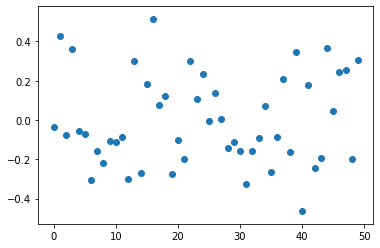

In [29]:
# Residual graph to observe bias in the model.
# No clear pattern shows that there is no bias in the model.
residual = y_pred - y_test

# "i" decides the number of datapoints
# i~20 is data points throughout one day. 
i = 50
plt.scatter(range(i), residual[:i])

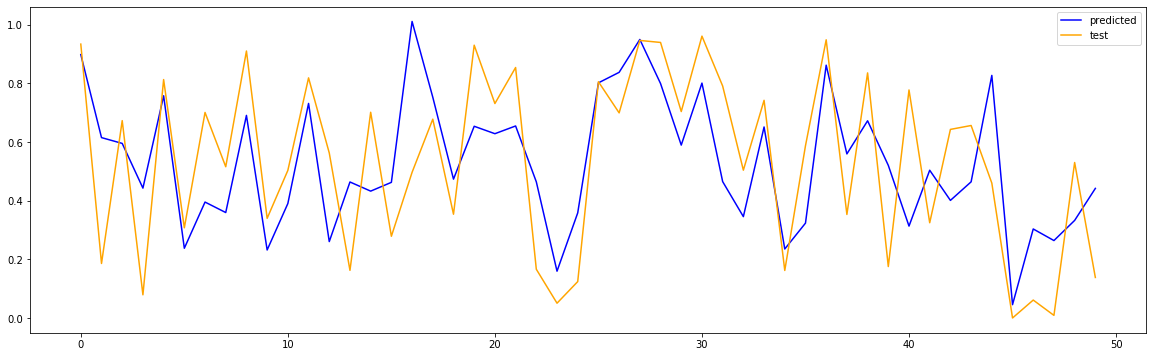

In [30]:
# Graph to show the predicted vs test data.
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(i), y_pred[:i], color='blue', label="predicted")
ax.plot(range(i), y_test[:i], color='orange', label="test")
ax.legend()

In [0]:
# Lasso is able to remove effects of unimpactful variables.
# Which means that I should be able to put as many properties as I want. 
x_columns = ['DHI', 'DNI', 'GHI', 'Cloud Type', 'Dew Point', 
             'Solar Zenith Angle', 'Surface Albedo', 'Wind Speed', 
             'Wind Direction', 'Relative Humidity', 'Temperature', 'Pressure']

In [0]:
# Splitting the data.
x_train, x_test, y_train, y_test= train_test_split(dataset[x_columns], dataset[y_column], test_size=0.33, random_state=42)

In [33]:
# The Lasso model
regr = Lasso(alpha=0.1)
y_pred = regr.fit(x_train, y_train).predict(x_test)
r2_score = regr.score(x_test, y_test)
print("R2 Score: ", r2_score)

R2 Score:  0.5546532120225744


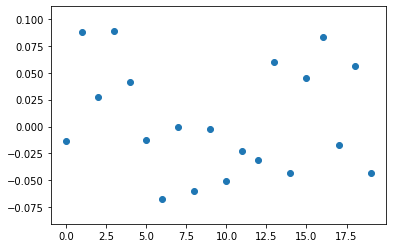

In [22]:
# Residual graph to see bias.
# A little bit of a pattern, I am not sure if this is of concern.
residual = y_pred - y_test
i = 20
plt.scatter(range(i), residual[:i])

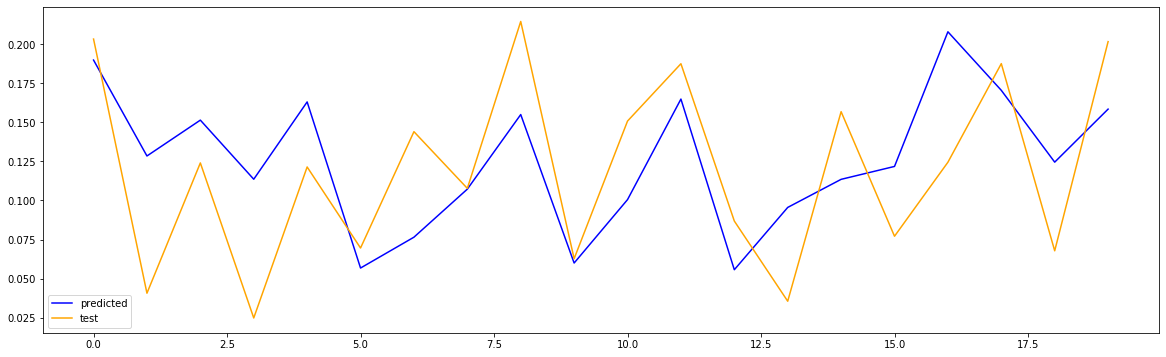

In [23]:
# Predicted vs test value
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(i), y_pred[:i], color='blue', label="predicted")
ax.plot(range(i), y_test[:i], color='orange', label="test")
ax.legend()